# Importing Necessary Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Explanation:**


*   **pandas** is used for data manipulation and analysis.
*   **numpy** is used for numerical operations.
*   **matplotlib** is used for data visualization.







# Reading the Dataset

In [2]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


**Explanation:**
**read_csv** is used to read the dataframe that is of csv format.

# Converting the categorical variables to numerical variables

In [4]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


# Checking for missing values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# Seperating Dataset into Features(X) and Target (y)

In [9]:
X = df.drop(columns='expenses')
print(X)

      age  sex   bmi  children  smoker  region
0      19    0  27.9         0       1       3
1      18    1  33.8         1       0       2
2      28    1  33.0         3       0       2
3      33    1  22.7         0       0       1
4      32    1  28.9         0       0       1
...   ...  ...   ...       ...     ...     ...
1333   50    1  31.0         3       0       1
1334   18    0  31.9         0       0       0
1335   18    0  36.9         0       0       2
1336   21    0  25.8         0       0       3
1337   61    0  29.1         0       1       1

[1338 rows x 6 columns]


**Explanation:** Creating a Dataframe **X** containing features by dropping the 'expenses' column.

In [10]:
y = df['expenses']

**Explanation:** **y** is assigned to 'expenses' column.

# Splitting Data into training and test sets.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

**Explanation:** Splitting the data into test set and training set such that the test set holds 1/3 parts of the data and training set holds 2/3 parts of the data.

# Building the Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

**Explanation:**


*    In order to build a linear regression model, the first step is to import LinearRegression from linear model from scikit learn module.
*   An object of the LinearRegression class is created.
*   Finally the model is trained using the fit function passing the train set as the input.


# Calculating Coefficients


In [15]:
c = reg.intercept_
c

-11777.069440280777

**Explanation:** c represents the y intercept of the model.

In [16]:
m = reg.coef_
m

array([  259.01328694,   -83.808971  ,   323.15396428,   554.96255326,
       23226.97448526,  -279.9432407 ])

**Explanation:** m represents the x intercepts of the model. Each value represents the coefficient of each feature variable.

# Predicting results for the training set

In [17]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([ 2.47231772e+03,  3.53095960e+04,  1.53451930e+04,  3.37596200e+03,
        1.96538085e+03,  1.02046163e+04,  1.00326341e+04,  1.11674972e+04,
        1.67398400e+04,  4.28835142e+03,  1.83886558e+03,  4.22953099e+03,
        5.60602770e+03,  6.20455344e+03,  2.65076672e+04,  1.42472402e+04,
        1.18429483e+04,  7.89969842e+03,  1.39984454e+04,  2.63711683e+03,
        1.32588316e+04,  1.17563173e+04,  2.18934673e+03,  9.23910700e+02,
        3.66604484e+04,  7.41349712e+03,  9.07259720e+03,  2.24424624e+03,
        1.15740191e+04,  7.71453222e+03,  1.17773364e+04,  2.54303638e+04,
        2.68446572e+04,  8.49288053e+03,  8.01031958e+03,  3.25924193e+02,
        4.81324047e+03,  7.78733393e+03,  3.23748202e+03,  8.40780989e+03,
        1.64350286e+03,  4.48539404e+03,  3.31450446e+04,  5.93403518e+03,
        1.15776603e+04,  8.95315395e+03,  3.12878317e+04,  1.16455381e+04,
        1.14146349e+04,  4.85981012e+03,  6.98229296e+03,  5.82113442e+03,
        4.94289542e+03,  

Visualizing the prediction results.

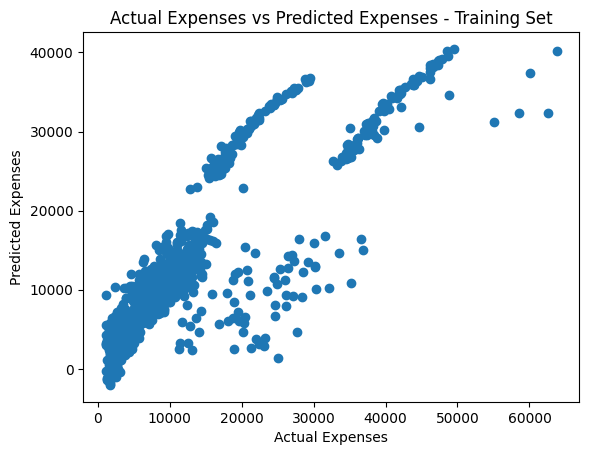

In [21]:
plt.scatter(y_train,y_pred_train)
plt.title("Actual Expenses vs Predicted Expenses - Training Set")
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.show()

R - squared score for Training Set

In [19]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.7283875607451584

# Prediction for Test Set.

In [20]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([11082.19506207,  9892.35766764, 37748.76666275, 16068.10107978,
        7001.75170647,  3861.06818031,  1384.11898523, 14580.3569126 ,
        9209.62960383,  7603.5661921 ,  4834.19529683, 10470.21063673,
        8737.93826132,  4063.12387938, 27289.39956267, 11391.53787786,
       11252.61689648,  5930.93344157,  8280.01951172, 26467.18851621,
       33419.97388794, 14480.26048691, 11677.07897691, 32047.32325678,
        4200.1314127 ,  9036.15219176,  1065.86617611, 10352.544037  ,
        3997.51285549, 10480.89727744,  9242.92523129, 39924.58400727,
       15444.07392104, 13598.66551602, 24290.8801993 ,  5009.32477137,
       12948.25284864, 30096.40523929, 33239.86841683,  3324.39358697,
        3978.17277877,  4106.61603203, 29998.87892167, 39175.54526075,
       27476.63901046,  5059.32608328, 11262.27629215,  7791.64821338,
        3625.36353895, 10737.45912993,  5458.30951275,  3545.12303412,
       32562.17767815, 38313.48241356, 16225.96582423,  6831.1439586 ,
      

Visualizing the results for the test set

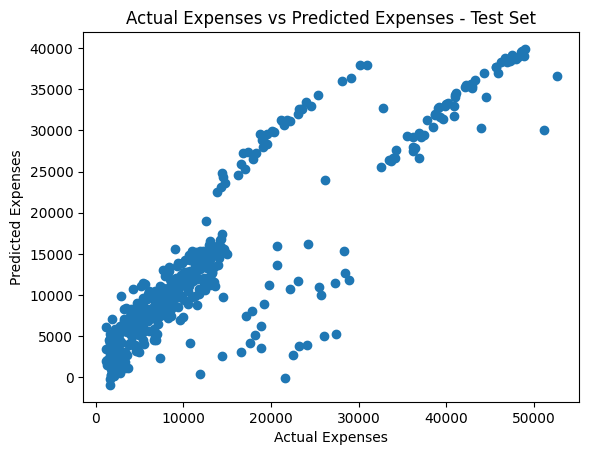

In [22]:
plt.scatter(y_test,y_pred_test)
plt.title("Actual Expenses vs Predicted Expenses - Test Set")
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.show()

R squared score for test set

In [23]:
r2_score(y_test,y_pred_test)

0.7880060546110194